<a href="https://colab.research.google.com/github/LinjingBi/ai_robotics_lab/blob/main/week7/lab_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network workshop

This notebook covers:
- Neural Network basics
- Implementing a Feedforward Neural Network
- Using CNNs for image classification
- Visualizing training with TensorBoard 🚀

## Installing and importing dependencies (5 min)

In [1]:

# Install dependencies (if not already installed)
!pip install numpy tensorflow matplotlib seaborn tensorboard

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  # For timestamped logs


## Exploring and Visualizing the MNIST Dataset (15 min)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


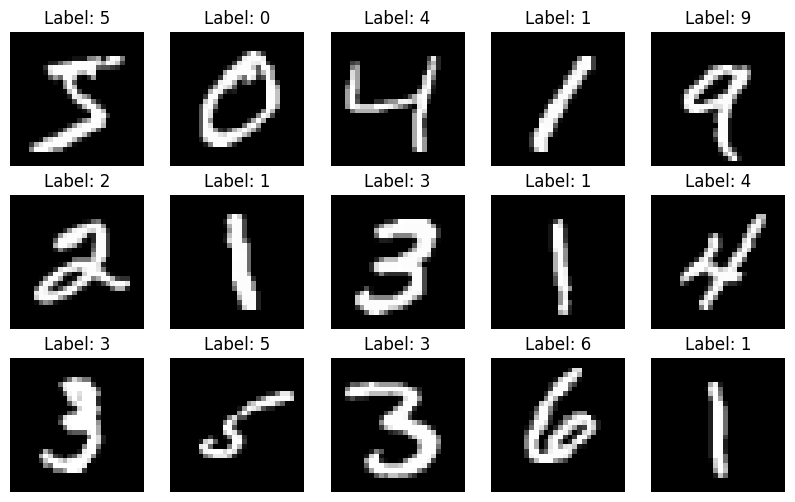

In [2]:

# Load dataset (MNIST - handwritten digits)
from tensorflow.keras.datasets import mnist

# Download and split dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (scale between 0 and 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display multiple sample images
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()


## ✨ Exercise 1: Explore the Dataset
Try the following:
1. Display 10 random images from the dataset with label 1


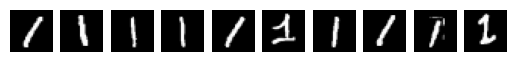

In [27]:
# Hint: select indices in the x_train dataset corresponding to y_train labels of 1 and display the images using matplotlib

import random

fig, axes = plt.subplots(1, 10)
x_selected = x_train[y_train == 1]


for i, ax in enumerate(axes.flat):
  ax.imshow(x_selected[i], cmap='gray')
  ax.axis('off')

plt.show()

2. Check the distribution of digits in the dataset using a histogram.

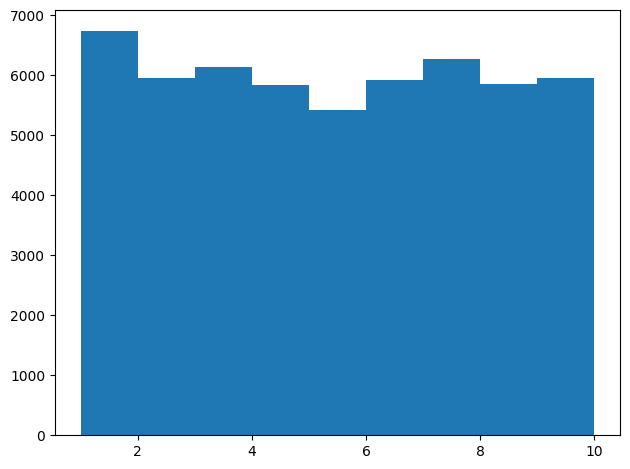

In [33]:
# Hint: use the y_train dataset to display the distribution of labels
y_train.shape

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(y_train, bins=range(1, 11))
# axs[1].hist(dist2, bins=n_bins)

plt.show()

##  Building a Feedforward Neural Network (45 min)

In [34]:

# Define a feedforward neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(128, activation='relu'),  # Hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with TensorBoard logging
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8795 - loss: 0.4270 - val_accuracy: 0.9590 - val_loss: 0.1372
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9657 - loss: 0.1156 - val_accuracy: 0.9722 - val_loss: 0.0912
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9779 - loss: 0.0757 - val_accuracy: 0.9744 - val_loss: 0.0823
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9830 - loss: 0.0558 - val_accuracy: 0.9765 - val_loss: 0.0770
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0438 - val_accuracy: 0.9755 - val_loss: 0.0729


## ✨ Exercise 2: Modify the Neural Network
1. Change the number of hidden layers and observe how accuracy changes.



In [40]:
# Hint: redefine the model variable
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(256, activation='relu'),  # Hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with TensorBoard logging
r = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8897 - loss: 0.3851 - val_accuracy: 0.9588 - val_loss: 0.1286
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9697 - loss: 0.0989 - val_accuracy: 0.9736 - val_loss: 0.0842
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9799 - loss: 0.0648 - val_accuracy: 0.9781 - val_loss: 0.0759
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9871 - loss: 0.0419 - val_accuracy: 0.9741 - val_loss: 0.0804
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.9904 - loss: 0.0322 - val_accuracy: 0.9785 - val_loss: 0.0702
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9791 - val_loss: 0.0722
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9805 - val_loss: 0.0719
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9963 - loss: 0

2. Increase the number of epochs and analyze training trends. Display training vs validation accuracy to check for overfitting.


Text(0.5, 1.0, 'Loss Over Epochs')

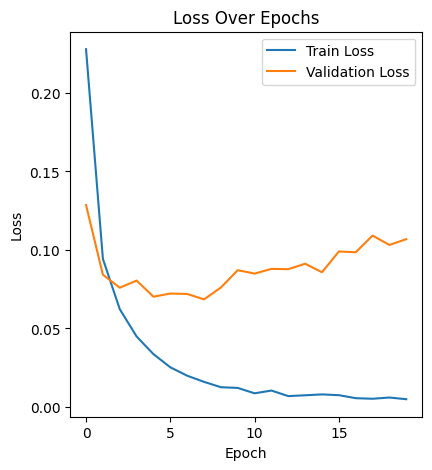

In [42]:
# Hint: change parameters in the model.fit() function
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

3. Experiment with different activation functions (e.g., `tanh`, `sigmoid`) and display the model performance for each function.


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8812 - loss: 0.4050 - val_accuracy: 0.9533 - val_loss: 0.1514
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9606 - loss: 0.1359 - val_accuracy: 0.9668 - val_loss: 0.1122
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9746 - loss: 0.0855 - val_accuracy: 0.9721 - val_loss: 0.0925
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9829 - loss: 0.0572 - val_accuracy: 0.9771 - val_loss: 0.0742
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9888 - loss: 0.0382 - val_accuracy: 0.9766 - val_loss: 0.0762
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9922 - loss: 0.0281 - val_accuracy: 0.9776 - val_loss: 0.0711
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9944 - loss: 0.0207 - val_accuracy: 0.9773 - val_loss: 0.0702
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9966 - loss: 0

Text(0.5, 1.0, 'Loss Over Epochs')

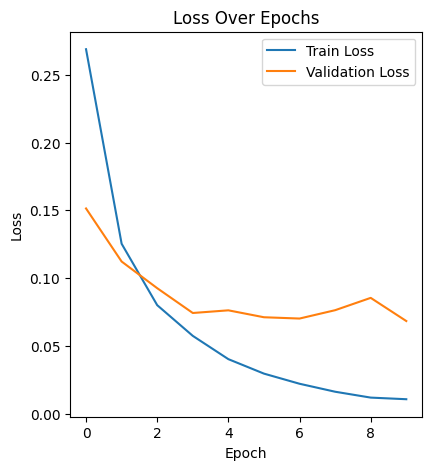

In [43]:
# Hint: change parameters in the model.compile() function
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(256, activation='tanh'),  # Hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model with TensorBoard logging
h = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(h.history['loss'], label='Train Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

4. Select your preferred activation function and try different optimizers (`SGD`, `RMSprop`,`Adamax`). Display the model performance for each optimizer.

In [45]:
# Hint: write a function to run models with different optimizers and save the accuracies to display

opts = ['SGD', 'RMSprop','Adamax']

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer
    keras.layers.Dense(256, activation='tanh'),  # Hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer
])


def build_and_train_model(optimizer):


    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5)

    # Get final accuracy
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return test_acc


for opt in opts:
  acc = build_and_train_model(opt)
  print(f'optimizer: {opt}, test accuracy: {acc}')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7636 - loss: 0.9028
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8972 - loss: 0.3657
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9104 - loss: 0.3189
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9161 - loss: 0.2898
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9230 - loss: 0.2729
optimizer: SGD, test accuracy: 0.9271000027656555
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9230 - loss: 0.2627
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9644 - loss: 0.1204
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9768 - loss: 0.0813
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9817 - loss: 0.0592
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9870 - loss: 0.0435
optimizer: RMSprop, test accuracy: 0.9775000214576721
Epoch 1/5
1875/1875 

## Implementing and exploring CNNs (45 min)

In [46]:

# Reshape data for CNN input
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Define a CNN model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile and train
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_data=(x_test_cnn, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.9022 - loss: 0.3229 - val_accuracy: 0.9849 - val_loss: 0.0487
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9867 - loss: 0.0458 - val_accuracy: 0.9883 - val_loss: 0.0332
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9900 - loss: 0.0308 - val_accuracy: 0.9879 - val_loss: 0.0356
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9939 - loss: 0.0201 - val_accuracy: 0.9899 - val_loss: 0.0292
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9950 - loss: 0.0159 - val_accuracy: 0.9910 - val_loss: 0.0298


In [47]:

# Reshape data for CNN input
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Define a CNN model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    # keras.layers.Conv2D(64, (3,3), activation='relu'),
    # keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile and train
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_data=(x_test_cnn, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9004 - loss: 0.3355 - val_accuracy: 0.9795 - val_loss: 0.0651
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9826 - loss: 0.0592 - val_accuracy: 0.9803 - val_loss: 0.0613
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9885 - loss: 0.0384 - val_accuracy: 0.9840 - val_loss: 0.0504
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9919 - loss: 0.0250 - val_accuracy: 0.9857 - val_loss: 0.0468
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9946 - loss: 0.0182 - val_accuracy: 0.9866 - val_loss: 0.0442


## ✨ Exercise 3: Experiment with CNN Architecture
1. Train the CNN with fewer training samples and observe how it affects performance.



In [ ]:
# Hint: reduce the x_train and y_train sets



2. Add more convolutional layers and see how accuracy changes.


In [ ]:
# Hint: modify the cnn_model

3. Try different kernel sizes (e.g., `(5,5)` instead of `(3,3)`).


In [ ]:
# Hint: change the parameters in the Conv2D layers

4. Add dropout layers to prevent overfitting.

In [ ]:
# Hint: Use keras.layers.Dropout(0.3) for dropout layers in your cnn_model



## Visualizing Feature Maps of CNN Layers (15 min)

We now aim to understand a bit more about the internal functioning of the CNN model we've written. Let's try to visualise the convolutional filters being created.

## ✨ Exercise 4: Visualise the CNN filters

Write a function that visualises the filters at each level of your CNN model and display them


(3, 3, 1, 32)


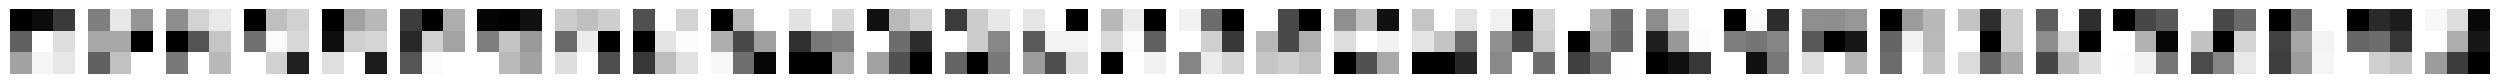

In [58]:


#  Visualizing Filters (Kernels)
def visualize_filters(model, layer_index=0):

    filters, biases = model.layers[layer_index].get_weights()  # Get filters and biases
    print(filters.shape)
    fig, axes = plt.subplots(filters.shape[-2], filters.shape[-1], figsize=(filters.shape[-1], filters.shape[-2]))
    # print(axes.shape)
    # fig.suptitle(f'Filters of layer {layer.name}', fontsize=12)
    # print(filters.shape)
    for i in range(filters.shape[-1]):
      for j in range(filters.shape[-2]):
        ax = axes[j, i] if filters.shape[-2] > 1 else axes[i]
        ax.imshow(filters[:, :, j, i], cmap='gray')  # Display filter
        ax.axis('off')
    plt.show()





    #....

# Call function to visualize filters in the first Conv2D layer
visualize_filters(cnn_model, layer_index=0)  # First Conv2D layer
# visualize_filters(cnn_model, layer_index=2)  # Second Conv2D layer



## Stretch goal: Train a Model on a Custom Dataset (1 hour)
1. Use a more complex image dataset (e.g.CIFAR-10 - 10 classes of more complex objects) and display examples of the data.
2. Train a model to classify the datset.
3. Modify the neural network architecture to improve accuracy and display its improved performance.
